<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkST0151ENSkillsNetwork20531532-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>



#### Import the required libraries we need for the lab.


In [2]:
import piplite
await piplite.install(['numpy'],['pandas'])
await piplite.install(['seaborn'])

In [3]:
import pandas as pd
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as pyplot
import scipy.stats
import statsmodels.api as sm
from statsmodels.formula.api import ols

#### Read the dataset in the csv file from the URL


In [92]:
from js import fetch
import io

URL = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
resp = await fetch(URL)
boston_url = io.BytesIO((await resp.arrayBuffer()).to_py())

In [93]:
boston_df=pd.read_csv(boston_url)

#### Add your code below following the instructions given in the course to complete the peer graded assignment


In [94]:
boston_df.head()

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0
1,1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6
2,2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7
3,3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4
4,4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2


### Task 2 


### Box Plot of Median Value of owner Occupied homes

<AxesSubplot:>

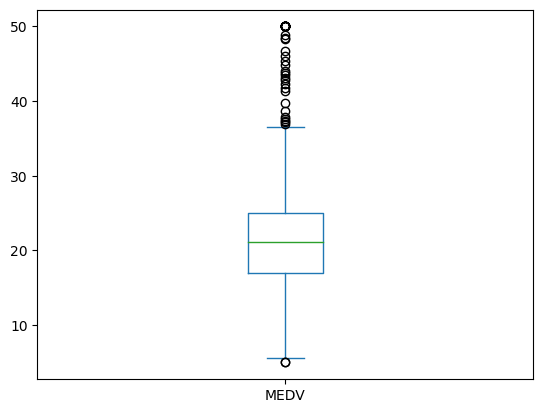

In [95]:
boston_df.MEDV.plot.box()

### Bar plot for charles river variable


In [96]:
data = boston_df.groupby("CHAS")[['ZN']].count().reset_index()
data['Count'] = data["ZN"]
data.drop("ZN", axis = 1, inplace = True)
data.CHAS = data.CHAS.astype(int).astype(str)

Text(0.5, 1.0, 'Bar plot of charles river variable')

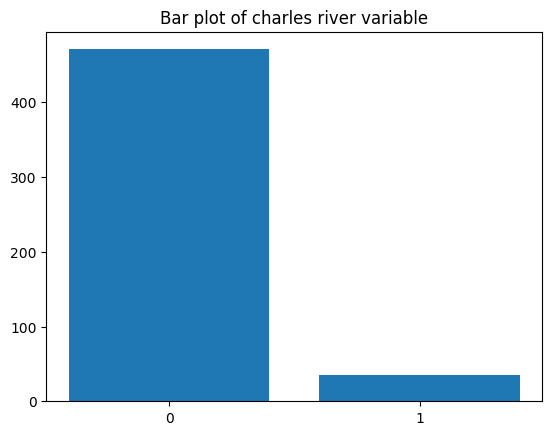

In [97]:
pyplot.bar(data.CHAS, data.Count)
pyplot.title("Bar plot of charles river variable")

In [98]:
boston_df

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0
1,1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6
2,2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7
3,3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4
4,4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,9.67,22.4
502,502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,9.08,20.6
503,503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,5.64,23.9
504,504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,6.48,22.0


In [99]:

# Create a new column to categorize age
boston_df['Age_Group'] = pd.cut(boston_df['AGE'], 
                                bins=[-float('inf'), 35, 70, float('inf')], 
                                labels=['35 or younger', '35 - 70', '70+'])


In [101]:
boston_df

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV,Age_Group
0,0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0,35 - 70
1,1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6,70+
2,2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7,35 - 70
3,3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4,35 - 70
4,4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2,35 - 70
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,9.67,22.4,35 - 70
502,502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,9.08,20.6,70+
503,503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,5.64,23.9,70+
504,504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,6.48,22.0,70+


### Boxplot for MEDV for age

Text(0.5, 1.0, 'Box plot for different age group')

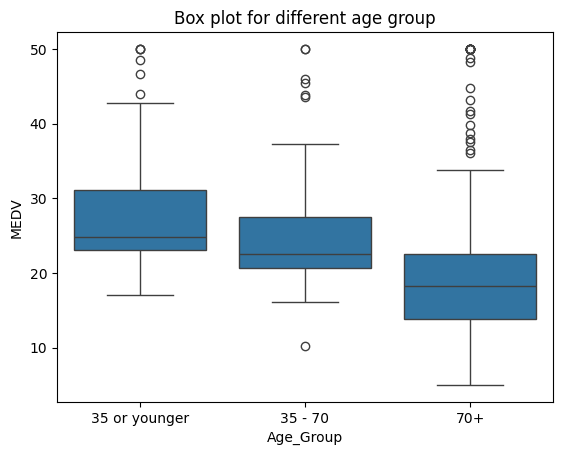

In [103]:
sns.boxplot(x= 'Age_Group', y = 'MEDV', data = boston_df)
pyplot.title("Box plot for different age group")

### Scatter Plot between NOX VS INDUS

[]

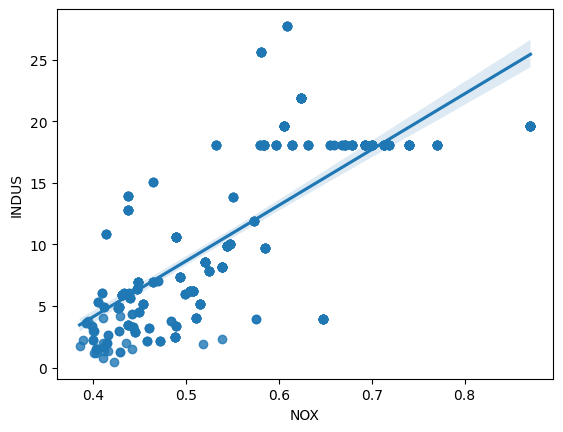

In [106]:
#sns.scatterplot(x = "NOX", y = "INDUS", data= boston_df)
sns.regplot(x = "NOX", y = "INDUS", data= boston_df)
pyplot.plot()

### Histogram of PTRATIO

<AxesSubplot:ylabel='Frequency'>

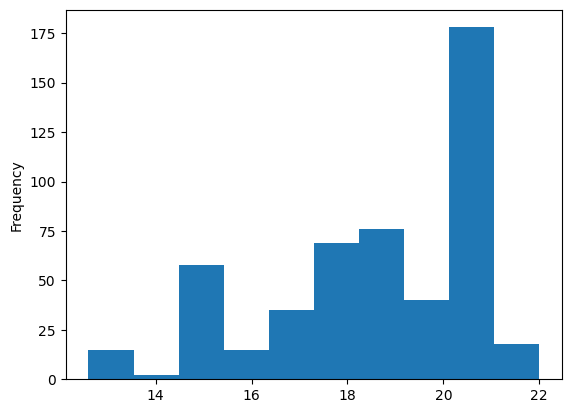

In [107]:
boston_df.PTRATIO.plot.hist()

### Task 3



#### Is there a significant difference in median value of houses bounded by the Charles river or not? (T-test for independent samples)


In [109]:
scipy.stats.ttest_1samp(boston_df.MEDV, popmean=boston_df.MEDV.mean())

TtestResult(statistic=0.0, pvalue=1.0, df=505)

### Is there a difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE)? (ANOVA)

In [111]:
scipy.stats.f_oneway(boston_df[boston_df['Age_Group'] == "35 or younger"]["MEDV"],
                    boston_df[boston_df['Age_Group'] == "35 - 70"]["MEDV"],
                    boston_df[boston_df['Age_Group'] == "70+"]["MEDV"])

F_onewayResult(statistic=36.40764999196599, pvalue=1.7105011022702984e-15)

### Can we conclude that there is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town? (Pearson Correlation)

In [112]:
scipy.stats.pearsonr(boston_df.NOX, boston_df.INDUS)

PearsonRResult(statistic=0.7636514469209192, pvalue=7.913361061210442e-98)

### What is the impact of an additional weighted distance  to the five Boston employment centres on the median value of owner occupied homes? (Regression analysis)

In [116]:
model = sm.OLS(boston_df.MEDV, boston_df.DIS).fit()
#(boston_df.DIS, boston_df.MEDV)

In [118]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                   MEDV   R-squared (uncentered):                   0.732
Model:                            OLS   Adj. R-squared (uncentered):              0.732
Method:                 Least Squares   F-statistic:                              1380.
Date:                Wed, 24 Jul 2024   Prob (F-statistic):                   1.52e-146
Time:                        15:49:16   Log-Likelihood:                         -1999.8
No. Observations:                 506   AIC:                                      4002.
Df Residuals:                     505   BIC:                                      4006.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
DIS            4.7985      0.129     37.149      0.000       4.545       5.052
==============================================================================
Omnibus:                       40.135   Durbin-Watson:                   0.343
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               90.968
Skew:                           0.431   Prob(JB):                     1.76e-20
Kurtosis:                       4.889   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""